<a href="https://colab.research.google.com/github/abhishek-chaudhary26/austin_housing_price_prediction/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Fri Nov  8 16:08:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

import pickle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/datasets/austinHousingData.csv')
df.head(10)

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
5,2080105342,pflugerville,14908 Spring Hill Ln,78660,"14908 Spring Hill Ln, Pflugerville, TX 78660 i...",30.437775,-97.656181,1.98,2,True,...,1,1,1.066667,4.000000,1223,14,2.0,3,1,2080105342_553d16748c296fce71f33902edd98d2d-p_...
6,241932337,pflugerville,14009 Cantata Ln,78660,This well-maintained 2016 home in the Retreat ...,30.414684,-97.643394,1.98,0,True,...,1,1,1.233333,3.666667,1051,12,3.0,4,2,241932337_78e2a51227f811bd3c65d6674e8a7939-p_f...
7,60134835,pflugerville,15009 Drusillas Dr,78660,"Wonderful home, freshly painted throughout, ne...",30.439404,-97.658035,1.98,0,True,...,1,1,1.166667,4.000000,1223,14,3.0,3,2,60134835_47efc51704a66b45a8a134022ceeddb1-p_f.jpg
8,60134833,pflugerville,1104 Traci Michelle Dr,78660,Solid 3 bed 2 bath with formal dining/living c...,30.439096,-97.657959,1.98,0,True,...,1,1,1.166667,4.000000,1223,14,2.0,3,2,60134833_aa596c71096f40a535ce679c788cae36-p_f.jpg
9,83827468,del valle,6808 Plains Crest Dr,78617,Beautiful 3 bed 2.5 bath home in great locatio...,30.160702,-97.638123,1.98,2,True,...,1,1,1.200000,3.000000,1615,14,3.0,3,2,83827468_017e0605bf1c5f86c4e18c99dd649432-p_f.jpg


In [7]:
df.isnull().sum()

,0
zpid,0
city,0
streetAddress,0
zipcode,0
description,2
latitude,0
longitude,0
propertyTaxRate,0
garageSpaces,0
hasAssociation,0


In [8]:
data_cleaned = df

In [9]:
data_cleaned.duplicated().sum()


0

In [10]:
data_cleaned["zipcode"].unique()

array([78660, 78617, 78717, 78724, 78747, 78725, 78726, 78744, 78732,
       78750, 78729, 78719, 78731, 78730, 78753, 78733, 78746, 78735,
       78734, 78737, 78619, 78759, 78739, 78652, 78653, 78758, 78749,
       78728, 78754, 78736, 78757, 78727, 78745, 78704, 78741, 78742,
       78752, 78723, 78748, 78738, 78705, 78703, 78702, 78701, 78722,
       78721, 78751, 78756])

In [11]:
data_cleaned["zpid"].unique()

array([ 111373431,  120900430, 2084491383, ...,   29473281,   29392029,
         29390174])

In [12]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [13]:
data_cleaned['latestPrice']

,latestPrice
0,305000.0
1,295000.0
2,256125.0
3,240000.0
4,239900.0
...,...
15166,330000.0
15167,550000.0
15168,875000.0
15169,420000.0


In [14]:
data_cleaned.drop("zpid" , axis = 1)

,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,True,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,True,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15169,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,False,True,...,1,1,1.300000,6.666667,1057,15,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


In [15]:
data_cleaned.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [16]:
data_cleaned['description'].head()

,description
0,"14424 Lake Victor Dr, Pflugerville, TX 78660 i..."
1,Absolutely GORGEOUS 4 Bedroom home with 2 full...
2,Under construction - estimated completion in A...
3,Absolutely darling one story home in charming ...
4,Brimming with appeal & warm livability! Sleek ...


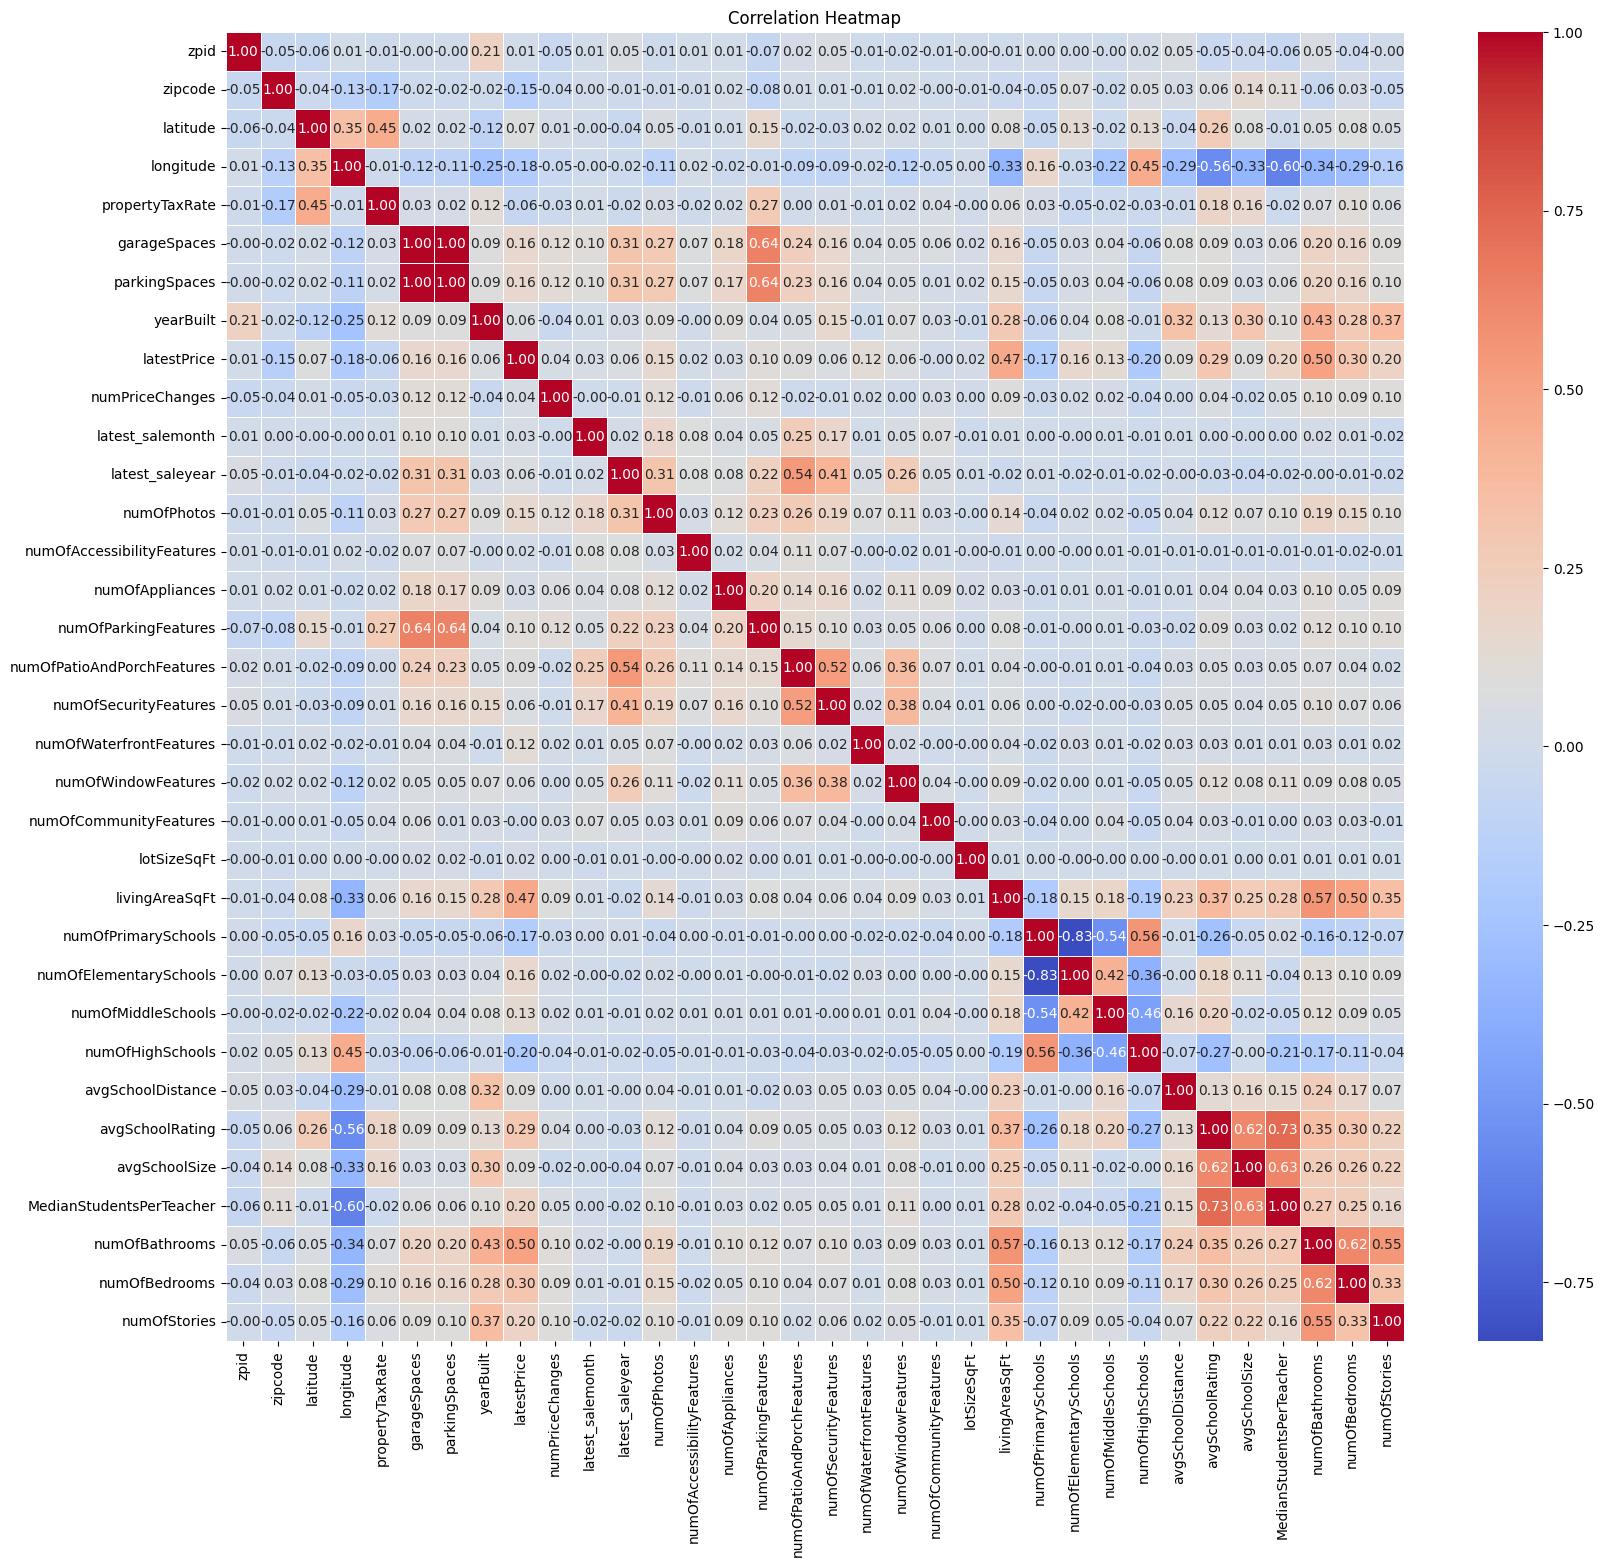

In [17]:
# Select only numeric columns
numeric_df = data_cleaned.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_df.corr()


plt.figure(figsize=(19, 17))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

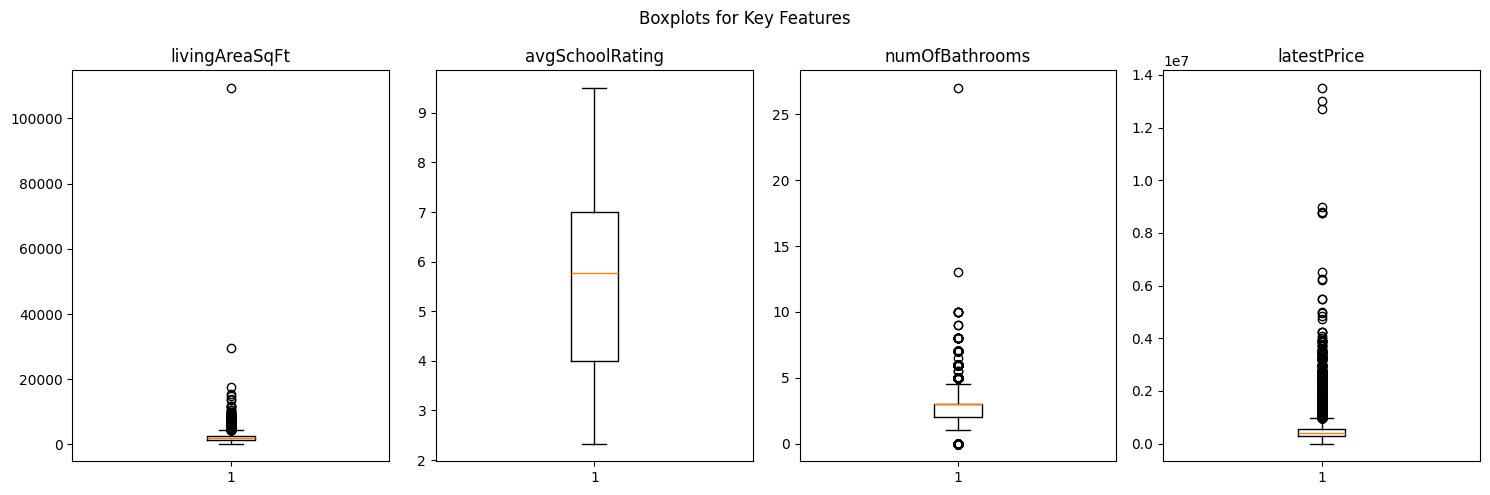

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# Boxplot for livingAreaSqFt
axs[0].boxplot(data_cleaned['livingAreaSqFt'])
axs[0].set_title("livingAreaSqFt")

# Boxplot for avgSchoolRating
axs[1].boxplot(data_cleaned['avgSchoolRating'])
axs[1].set_title("avgSchoolRating")

# Boxplot for numOfBathrooms
axs[2].boxplot(data_cleaned['numOfBathrooms'])
axs[2].set_title("numOfBathrooms")

# Boxplot for latestsaleprice
axs[3].boxplot(data_cleaned['latestPrice'])
axs[3].set_title("latestPrice")

# Customize the figure
fig.suptitle("Boxplots for Key Features")
plt.tight_layout()
plt.show()

In [19]:
# Remove outliers
size_before_remove = df.shape[0]
data_cleaned = data_cleaned[(data_cleaned["numOfBedrooms"] >= 1) & (data_cleaned["numOfBedrooms"] <= 6)]
data_cleaned = data_cleaned[(data_cleaned["numOfBathrooms"] >= 1) & (data_cleaned["numOfBathrooms"] <= 5)]
data_cleaned = data_cleaned[data_cleaned["livingAreaSqFt"] <= 20000]
data_cleaned = data_cleaned[data_cleaned["latestPrice"] <= 1000000]

print("Number of outliers:",  size_before_remove - df.shape[0])

Number of outliers: 0


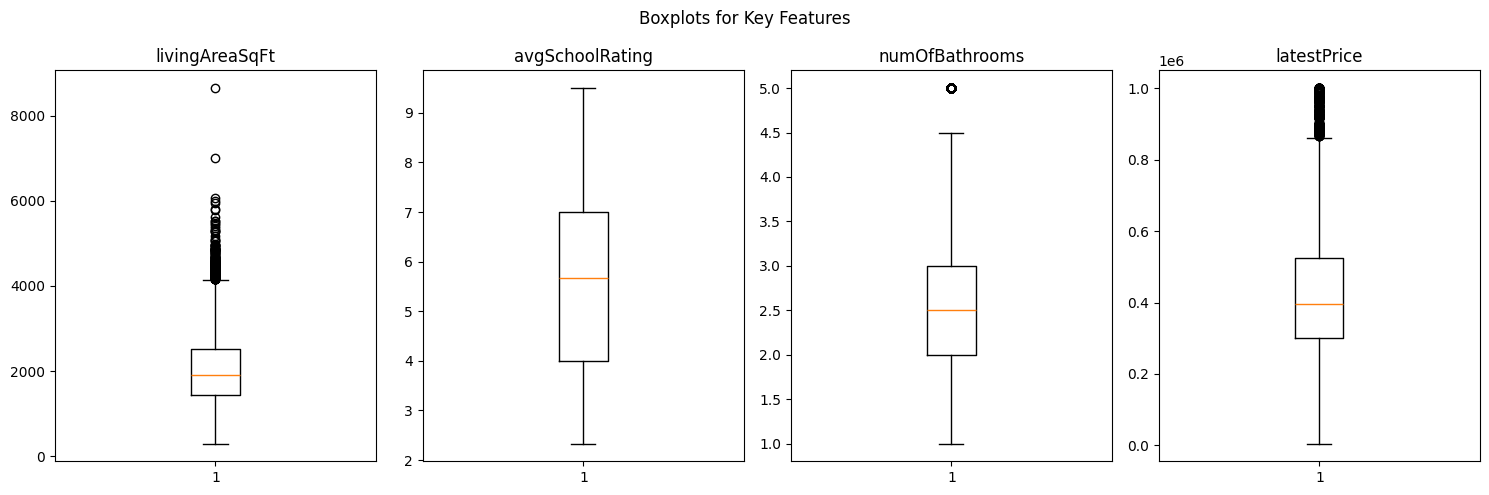

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# Boxplot for livingAreaSqFt
axs[0].boxplot(data_cleaned['livingAreaSqFt'])
axs[0].set_title("livingAreaSqFt")

# Boxplot for avgSchoolRating
axs[1].boxplot(data_cleaned['avgSchoolRating'])
axs[1].set_title("avgSchoolRating")

# Boxplot for numOfBathrooms
axs[2].boxplot(data_cleaned['numOfBathrooms'])
axs[2].set_title("numOfBathrooms")

# Boxplot for latestsaleprice
axs[3].boxplot(data_cleaned['latestPrice'])
axs[3].set_title("latestPrice")

# Customize the figure
fig.suptitle("Boxplots for Key Features")
plt.tight_layout()
plt.show()

In [21]:
# Count encoding for homeType
import category_encoders as ce
count_encoder = ce.CountEncoder()
data_cleaned['homeType_count'] = count_encoder.fit_transform(data_cleaned['homeType'])

# Convert date string to timestamp
data_cleaned['latest_saledate'] = pd.to_datetime(data_cleaned['latest_saledate'])
data_cleaned['latest_saledate'] = data_cleaned['latest_saledate'].apply(lambda x: int(x.timestamp()))

In [22]:
X = data_cleaned.drop(['latestPrice'] , axis = 1)
y = data_cleaned["latestPrice"]

In [23]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state= 4)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (11223, 47)
X_test shape: (2806, 47)
y_train shape: (11223,)
y_test shape: (2806,)


# #  random forest

In [25]:
# Initialize the model
random_forest_model = RandomForestRegressor(n_estimators=30, random_state=100)

# Train the model
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=30, random_state=100)

In [26]:
with open("random_model.pickle" , 'wb') as f:
    pickle.dump(random_forest_model, f)

In [27]:
y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 7924385794.22
Root Mean Squared Error (RMSE): 89019.02
R² Score: 0.76


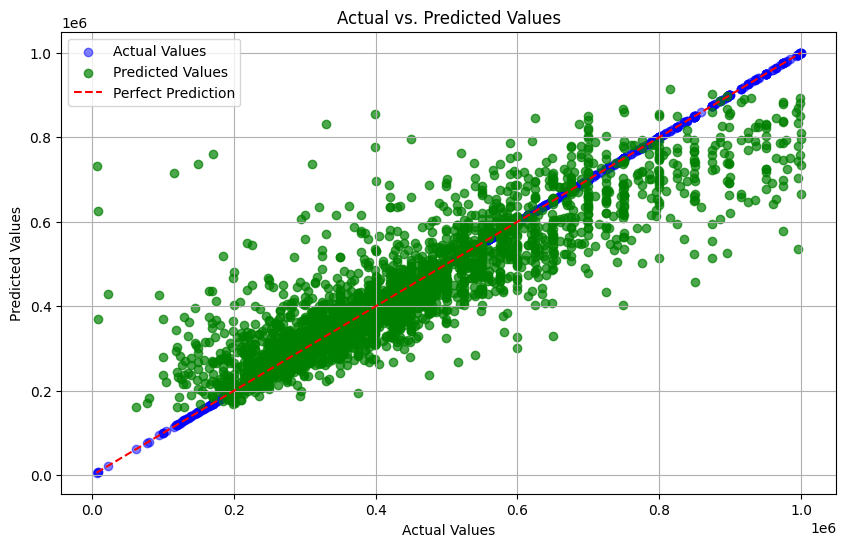

In [28]:
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Predicted Values')

# Line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid()
plt.show()


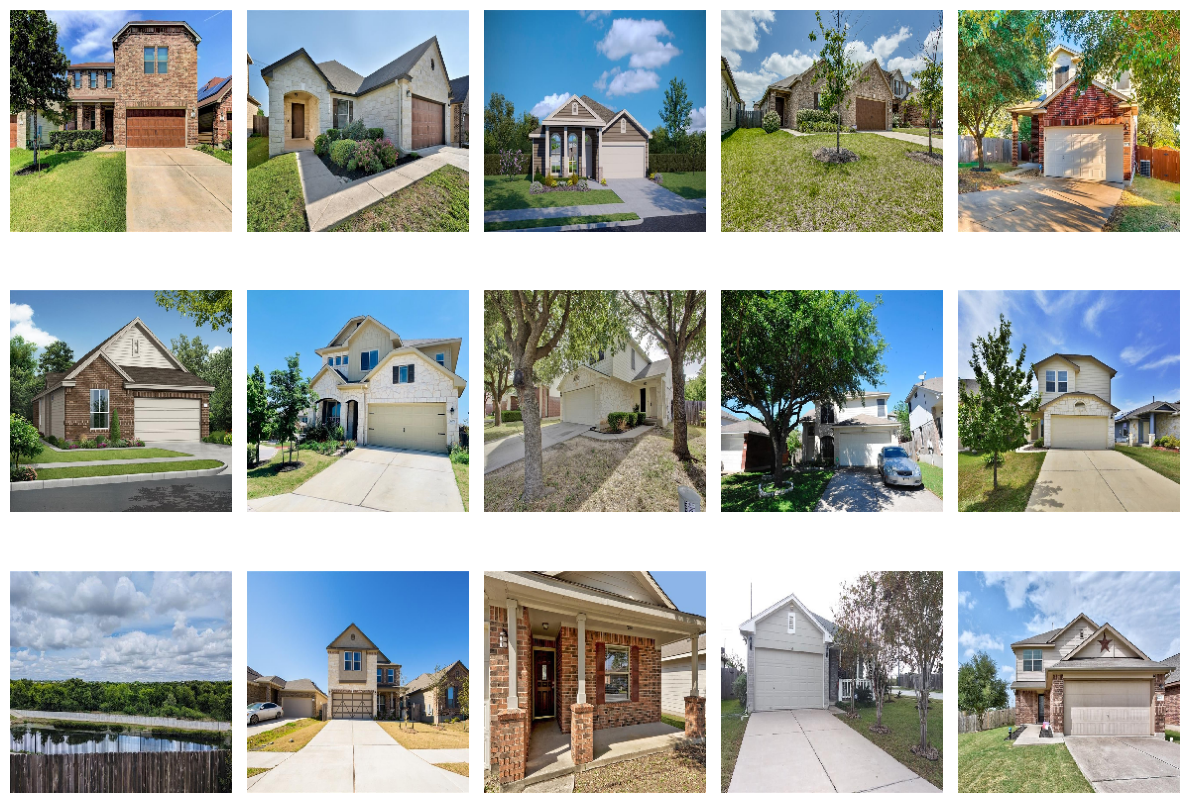

In [29]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_path = "/content/drive/MyDrive/datasets/homeImages/"

# Set up a 4 x 5 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 9))

# Loop over the images and plot them in the subplots
for i, row in data_cleaned.head(15).iterrows():
    img = load_img(image_path+row['homeImage'], target_size=(224, 224))  # Load the image and resize it to 224 x 224
    img = img_to_array(img) / 255.0  # Convert the image to a NumPy array and normalize the pixel values
    axes[i // 5, i % 5].imshow(img)  # Plot the image in the corresponding subplot
    axes[i // 5, i % 5].axis('off')  # Turn off the axis labels


plt.tight_layout()
plt.show()

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# split for CNN model
X1_train, X1_test, y1_train, y1_test = train_test_split(df['homeImage'], df['latestPrice'], test_size=0.2, random_state=42)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    brightness_range=(0.5, 1.5),

)

img_width = 224
img_height = 224

train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.concat([X1_train, y1_train], axis=1),
    directory=image_path,
    x_col="homeImage",
    y_col="latestPrice",
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='raw'
)

test_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.concat([X1_test, y1_test], axis=1),
    directory=image_path,
    x_col="homeImage",
    y_col="latestPrice",
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

Found 12136 validated image filenames.
Found 3035 validated image filenames.


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

# Create the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=train_generator.samples // train_generator.batch_size
)
# evaluate
scores = model.evaluate_generator(test_generator, steps=len(y1_test) // train_generator.batch_size)
print("Validation loss:", scores[0])
print("Validation RMSE:", scores[1])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/379 ━━━━━━━━━━━━━━━━━━━━ 56:30 14s/step - loss: 286462771200.0000 - mae: 378373.8438

KeyboardInterrupt: 